In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

# anova model from formula
from statsmodels.formula.api import ols
# anova table from ols model
from statsmodels.stats.anova import anova_lm
# for qqplot
import statsmodels.api as sm
# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
data = pd.read_csv('diet.csv')
data.head()

,gender,diet,preweight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


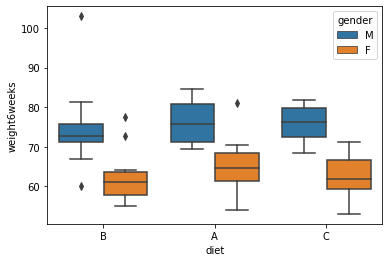

In [4]:
sns.boxplot(data=data, x='diet', y='weight6weeks', hue='gender');

<b>Вопросы:</b>
1. Влияет ли пол пациента на значение веса после эксперимента?
2. Влияет ли тип диеты (А/В/С), которой придерживается пациент, на значение веса после эксперимента?

### One-way ANOVA

<b>Шаг 1. Постановка гипотез:</b>
    
$H_0$: среднее значение веса после окончания эксперимента у мужчин и женщин равны.

$H_1$: среднее значение веса после окончания эксперимента у мужчин и женщин различаются.

<b>Шаг 2. Выбор уровня значимости:</b>
$$\alpha = 0.05$$

<b>Шаг 3. Проведение дисперсионного анализа:</b>

In [5]:
sample_f = data[data.gender == 'F'].weight6weeks
sample_m = data[data.gender == 'M'].weight6weeks

In [6]:
stats.f_oneway(sample_f, sample_m)

F_onewayResult(statistic=66.16218641135315, pvalue=6.097208570818775e-12)

In [7]:
model = ols('weight6weeks ~ gender', data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,2854.201553,2854.201553,66.162186,6.097209e-12
Residual,76.0,3278.599601,43.139468,NaN,NaN


<b>Шаг 4. Проверка применимости метода:</b>
- Нормальность распределения факторов или остатков.
- Гомоскедастичность (дисперсия внутри каждой группы должна быть примерно одинаковой).

In [8]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9333085417747498, pvalue=0.000513662351295352)

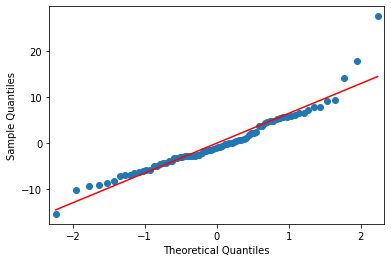

In [10]:
sm.qqplot(model.resid, line='s');

In [11]:
stats.bartlett(sample_f, sample_m)

BartlettResult(statistic=0.6939274163080743, pvalue=0.40483172475647555)

2. Влияет ли тип диеты (А/В/С), которой придерживается пациент, на значение веса после эксперимента?

In [12]:
model = ols('weight6weeks ~ diet', data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
diet,2.0,29.841339,14.920670,0.183362,0.832839
Residual,75.0,6102.959815,81.372798,NaN,NaN


<b>Шаг 5 (опционально). Апостериорный анализ:</b>

In [14]:
print(pairwise_tukeyhsd(endog=data.weight6weeks, groups=data.diet, alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -1.4898 0.8266  -7.541 4.5613  False
     A      C  -1.0935 0.9023 -7.1447 4.9576  False
     B      C   0.3963 0.9857 -5.4742 6.2668  False
---------------------------------------------------


In [15]:
print(pairwise_tukeyhsd(endog=data.weight6weeks, groups=data.gender, alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     F      M  12.1625   0.0 9.1844 15.1405   True
--------------------------------------------------


### Two-way ANOVA

<b>Вопросы:</b>
1. Влияет ли пол пациента на значение веса после эксперимента?
2. Влияет ли тип диеты (А/В/С), которой придерживается пациент, на значение веса после эксперимента?
3. Есть ли эффект взаимодействия между полом пациента и типом диеты? Например, более сильное влияние определенного типа диеты только на женщин.

<b>Шаг 1. Постановка гипотез:</b>
    
$H_0$: среднее значение веса после окончания эксперимента у групп мужчин и женщин с различными типами диет(А/В/С) одинаково.

$H_1$: среднее значение веса после окончания эксперимента у групп мужчин и женщин с различными типами диет(А/В/С) различаются.

<b>Шаг 2. Выбор уровня значимости:</b>
$$\alpha = 0.05$$

<b>Шаг 3. Проведение дисперсионного анализа:</b>

In [18]:
model = ols('weight6weeks ~ diet + gender + diet:gender', data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
diet,2.0,29.841339,14.920670,0.335607,7.160162e-01
gender,1.0,2891.375733,2891.375733,65.035052,1.162414e-11
diet:gender,2.0,10.555631,5.277816,0.118713,8.882364e-01
Residual,72.0,3201.028451,44.458728,NaN,NaN


<b>Шаг 4. Проверка применимости метода:</b>
- Нормальность распределения факторов или остатков.
- Гомоскедастичность (дисперсия внутри каждой группы должна быть примерно одинаковой).

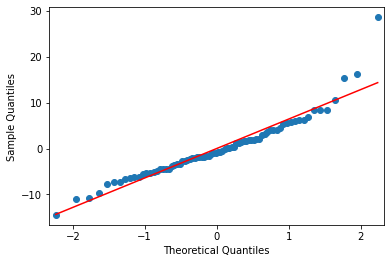

In [23]:
sm.qqplot(model.resid, line='s');

In [29]:
sample_a_f = data[(data.diet == 'A') & (data.gender == 'F')].weight6weeks
sample_b_f = data[(data.diet == 'B') & (data.gender == 'F')].weight6weeks
sample_c_f = data[(data.diet == 'C') & (data.gender == 'F')].weight6weeks

sample_a_m = data[(data.diet == 'A') & (data.gender == 'M')].weight6weeks
sample_b_m = data[(data.diet == 'B') & (data.gender == 'M')].weight6weeks
sample_c_m = data[(data.diet == 'C') & (data.gender == 'M')].weight6weeks

In [30]:
stats.bartlett(sample_a_f, sample_b_f, sample_c_f, sample_a_m, sample_b_m, sample_c_m)

BartlettResult(statistic=9.54750655147314, pvalue=0.08911993500142686)

<b>Шаг 5. Апостериорный анализ:</b>

<b>Тест (Tukey HSD test)</b>

In [31]:
data['combination'] = data.gender + '/' + data.diet

print(pairwise_tukeyhsd(endog=data.weight6weeks, groups=data.combination, alpha=0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   F/A    F/B     -2.7 0.8911 -10.0787  4.6787  False
   F/A    F/C  -2.2252 0.9458  -9.4799  5.0295  False
   F/A    M/A  11.2714 0.0015   3.1885 19.3544   True
   F/A    M/B   9.5676  0.005   2.0483 17.0869   True
   F/A    M/C  10.8881 0.0012   3.2081 18.5681   True
   F/B    F/C   0.4748    1.0  -6.7799  7.7295  False
   F/B    M/A  13.9714    0.0   5.8885 22.0544   True
   F/B    M/B  12.2676 0.0001   4.7483 19.7869   True
   F/B    M/C  13.5881    0.0   5.9081 21.2681   True
   F/C    M/A  13.4967 0.0001   5.5267 21.4666   True
   F/C    M/B  11.7928 0.0002   4.3952 19.1904   True
   F/C    M/C  13.1133    0.0   5.5524 20.6743   True
   M/A    M/B  -1.7038 0.9902  -9.9153  6.5076  False
   M/A    M/C  -0.3833    1.0  -8.7423  7.9756  False
   M/B    M/C   1.3205 0.9962  -6.4946  9.1357  False
----------------------------